In [1]:
print("Hello World")

Hello World


In [2]:
from time import sleep
from lab_devices import devices
from numpy import linspace

devs = devices()
duck = devs['Duck']
dmm = devs['DMM 1']
lockin = devs['Lockin 1']

Cannot Initiate device Duck(MAC) : could not open port '/dev/tty.usbmodem1421': FileNotFoundError(2, 'The system cannot find the path specified.', None, 3)




In [3]:
dmm.set_DCV()
duck.set_ramp_rate(0.1)
duck.set_AC(0,.3)
duck.set_DC(0,0)
duck.set_AC(1,1)

In [4]:
index = linspace(0,5,50)
res = [] 
for value in index:
    duck.set_DC(0, value)
    sleep(2)
    res.append([dmm.current_value, lockin.x])
    print(value, res[-1])

0.0 [0.0422702533, 0.241761]
0.102040816327 [0.0589303034, 0.241609]
0.204081632653 [0.244534361, 0.241578]
0.30612244898 [0.309686593, 0.241639]
0.408163265306 [0.365370997, 0.241609]
0.510204081633 [0.555358733, 0.241609]
0.612244897959 [0.653024557, 0.241639]
0.714285714286 [0.761541101, 0.241639]
0.816326530612 [0.769428116, 0.24167]
0.918367346939 [0.966415917, 0.2417]
1.02040816327 [0.976379759, 0.241761]
1.12244897959 [1.17282186, 0.241792]
1.22448979592 [1.23166768, 0.241761]
1.32653061224 [1.33273764, 0.241792]
1.42857142857 [1.39126787, 0.241853]
1.5306122449 [1.47843159, 0.241883]
1.63265306122 [1.68777012, 0.241853]
1.73469387755 [1.72089963, 0.241883]
1.83673469388 [1.88264541, 0.241944]
1.9387755102 [1.88448574, 0.241944]
2.04081632653 [1.98695688, 0.242005]
2.14285714286 [2.19191807, 0.242036]
2.24489795918 [2.24837125, 0.242066]
2.34693877551 [2.40657051, 0.242097]
2.44897959184 [2.39921736, 0.242127]
2.55102040816 [2.59840608, 0.242188]
2.65306122449 [2.61625053, 0.242

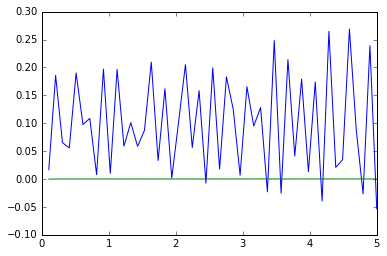

In [8]:
from pandas import DataFrame
%matplotlib inline
df = DataFrame(res,columns=['dmm','lockin'], index = index)
df.dmm.diff().plot()
df.lockin.diff().plot()

In [9]:
devs.close()

Closed Device : Duck
Closed Device : DMM 1
Closed Device : Lockin 1
